<a href="https://colab.research.google.com/github/timmersarruda/IA/blob/main/Timmers_Araujo_Arruda_Junior_noteoobk_aula_pratica_fundamentos_de_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Prático: Workflow IA

## Classificação de Flores Íris

O objetivo nessa prática é apresentar o workflow básico pra criação de um modelo inteligente para solucionar um problema de classificação. Desta forma, vamos realizar, passo a passo, as quatro principais etapas do processo: Extração de atributos, Divisão dos dados, Treinamento do modelo e Avaliação do modelo.

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/01_workflow_completo.jpg", width="640"/>
<div/>

# 1) Extração de Atributos

Carregando e entendendo o conjunto de dados

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/02_extracao_dados.jpg", width="640"/>
</div>

In [2]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt

# dataset, arquivo com as amostras das medições das flores
arquivo = 'https://raw.githubusercontent.com/rafaelmm82/ufpb-ia-20201/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/iris.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_csv
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, header=0)

# exibindo a dimensão dos dados carregados (linhas, colunas)
print(dataset.shape)

(150, 5)


In [3]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
print(dataset.head(10))

# exibindo os 10 últimas linhas de valores do dataset
print(dataset.tail(10))

   comp. sépala  larg. sépala  comp. pétala  larg. pétala  classe
0           5.1           3.5           1.4           0.2  Setosa
1           4.9           3.0           1.4           0.2  Setosa
2           4.7           3.2           1.3           0.2  Setosa
3           4.6           3.1           1.5           0.2  Setosa
4           5.0           3.6           1.4           0.2  Setosa
5           5.4           3.9           1.7           0.4  Setosa
6           4.6           3.4           1.4           0.3  Setosa
7           5.0           3.4           1.5           0.2  Setosa
8           4.4           2.9           1.4           0.2  Setosa
9           4.9           3.1           1.5           0.1  Setosa
     comp. sépala  larg. sépala  comp. pétala  larg. pétala     classe
140           6.7           3.1           5.6           2.4  Virginica
141           6.9           3.1           5.1           2.3  Virginica
142           5.8           2.7           5.1           1.9  

In [5]:
# para acesssar uma linha aleatória
print(dataset.iloc[80])

comp. sépala           5.5
larg. sépala           2.4
comp. pétala           3.8
larg. pétala           1.1
classe          Versicolor
Name: 80, dtype: object


In [6]:
# para saber a quantidade dados por classe
print(dataset.groupby('classe').size())

classe
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


In [7]:
# para obter um resumo estatístico dos dados
print(dataset.describe())

       comp. sépala  larg. sépala  comp. pétala  larg. pétala
count    150.000000    150.000000    150.000000    150.000000
mean       5.843333      3.057333      3.758000      1.199333
std        0.828066      0.435866      1.765298      0.762238
min        4.300000      2.000000      1.000000      0.100000
25%        5.100000      2.800000      1.600000      0.300000
50%        5.800000      3.000000      4.350000      1.300000
75%        6.400000      3.300000      5.100000      1.800000
max        7.900000      4.400000      6.900000      2.500000


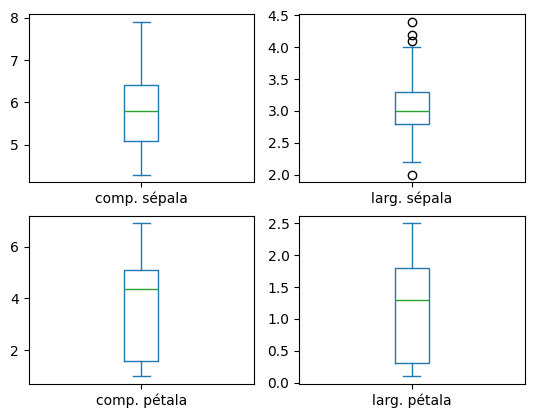

In [8]:
# exibindo um gráfico do tipo 'boxplot' em um grid de 2x2
# com coordenadas independentes
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

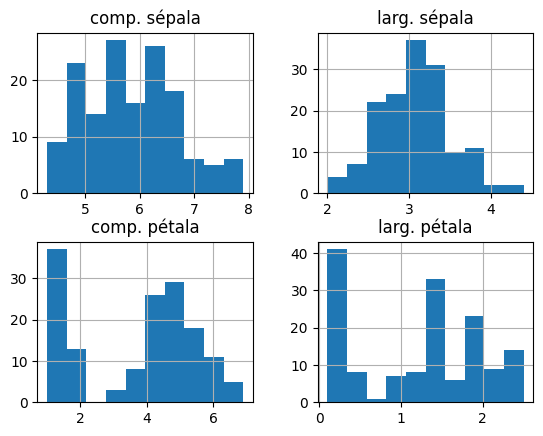

In [9]:
# exibindo um gráfico de histogramas para entender a distribuição dos mesmos
dataset.hist()
plt.show()

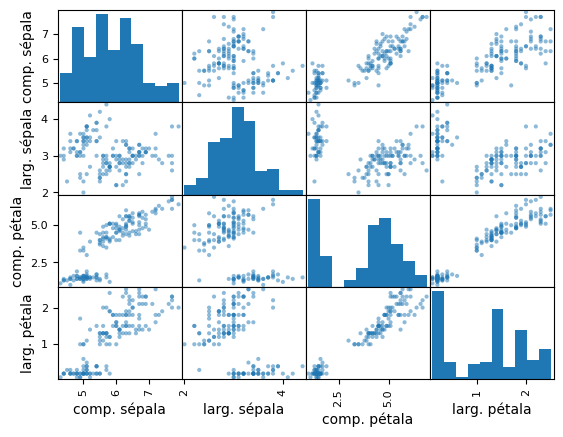

In [10]:
# gráfico tipo 'scatter plot' para verificar correlações entre as variáveis
pd.plotting.scatter_matrix(dataset)
plt.show()

# 2 - Divisão dos dados

Criando dois conjuntos de dados para serem utilizados nas etapas seguintes, treinamento e avaliação.

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/03_divisao_dados.jpg", width="640"/>
</div>

In [11]:
# carregando uma função pertencente ao scikit-learn para realizar
# automaticamente uma amostragem sem reposição aleatória e dividir
# os dados em dois conjuntos
from sklearn.model_selection import train_test_split

# importante lembrar que as 4 primeiras colunas são o nosso 'X'
# ou seja, os dados de entrada do modelo, e que a última coluna
# é o nosso 'y', ou seja, o dado que o modelo deve aprender a predizer
print('exemplo dado de entrada (x):\n', dataset.iloc[4,:4])

print('\nexemplo dado de saída (y)\n', dataset.iloc[4,4])

exemplo dado de entrada (x):
 comp. sépala    5.0
larg. sépala    3.6
comp. pétala    1.4
larg. pétala    0.2
Name: 4, dtype: object

exemplo dado de saída (y)
 Setosa


In [12]:
# criando os dados de entrada e saída para treinamento e validação
# usando o método 'values' ele retorna um array bidimensional
# para serem inseridos na função train_test_split
array = dataset.values
print(type(array))
X = array[:,0:4]
y = array[:,4]

print('\ndimensão de X\n', X.shape)
print('\ndimensão de y\n', y.shape)

<class 'numpy.ndarray'>

dimensão de X
 (150, 4)

dimensão de y
 (150,)


In [13]:

# utilizando um critério de divisão percentual 20% na função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# olhando alguns dados referentes aos conjuntos
print(f'\n dimensão de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\n dimensão de X_test {X_test.shape} e de y_test {y_test.shape}.')


 dimensão de X_train (120, 4) e y_train (120,)

 dimensão de X_test (30, 4) e de y_test (30,).


# 3 - Treinamento do Modelo

Definindo um modelo e realizando o treinamento

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/04_treinamento_modelo.jpg", width="640"/>
</div>

In [14]:
# carregando a classe pra criar um modelo do scikit-learn
from sklearn.svm import SVC

# instanciando um objeto do modelo SVC com parâmetros padrões
model = SVC(gamma='auto')

In [15]:
# executa o método de treinamento 'fit', para ajustar os parâmetros
# do modelo, a partir de um algoritmo de aprendizagem, em função
# dos valores contidos no conjunto de dados
model.fit(X_train, y_train)

SVC(gamma='auto')

# 4 - Avaliação do Modelo

Utilizando o conjunto de dados de teste define-se uma métrica estatística de
avaliação e deduz-se a qualidade do resultado do treinamento

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/05_avaliacao_modelo.jpg", width="640"/>
<div/>

In [16]:
# carregando funções da biblioteca scikit-learn que auxiliam no cálculo
# das avaliações dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)

In [17]:
# para efeitos de comparação e devido ao fato do conjunto ser pequeno
# podemos observar visualmente o resultdo da predição e o valor real do dataset

print('valores preditos\n', prediction)
print('\nvalores reais do dataset\n', y_test)
print('\ncomparativo lógico entre ambos\n', prediction == y_test)

valores preditos
 ['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica']

valores reais do dataset
 ['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica']

comparativo lógico entre ambos
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True]


In [18]:
# usando funções e métricas mais robustas para avaliar o desempenho

# exibindo a acurácia do modelo para este treinamento
print('acurácia\n', accuracy_score(y_test, prediction))

acurácia
 0.9666666666666667


In [19]:
# exibindo a matrix confusão VP, FP, VN FN
print('matrix confusão\n', confusion_matrix(y_test, prediction))

matrix confusão
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [20]:
# exibindo um relatório mais completo com os índices:
# precisão, recall, f1-score e support
print('relatório completo\n', classification_report(y_test, prediction))

relatório completo
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Qual conclusão podemos tirar do processo de treinamento?

E se, por exemplo, tivéssemos usado outros valores para divisão dos dados?

In [21]:
# para avaliar o que aconteceria se tivéssemos utilizado outra propoção de dados
# para treino e validação podemos refazer parte do procedimento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=1)
print(f'\ndimensão de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\ndimensão de X_test {X_test.shape} e de y_test {y_test.shape}.')

# Cria novamente o modelo, treina, prediz e avalia
model_2 = SVC(gamma='auto')
model_2.fit(X_train, y_train)
prediction = model_2.predict(X_test)
print('\nacurácia\n', accuracy_score(y_test, prediction))
print('\nmatrix confusão\n', confusion_matrix(y_test, prediction))
print('\nrelatório completo\n', classification_report(y_test, prediction))


dimensão de X_train (7, 4) e y_train (7,)

dimensão de X_test (143, 4) e de y_test (143,).

acurácia
 0.8321678321678322

matrix confusão
 [[49  0  0]
 [ 0 25 23]
 [ 0  1 45]]

relatório completo
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        49
  Versicolor       0.96      0.52      0.68        48
   Virginica       0.66      0.98      0.79        46

    accuracy                           0.83       143
   macro avg       0.87      0.83      0.82       143
weighted avg       0.88      0.83      0.82       143

